In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp


## 
Read the CSV File

In [3]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Admin\Downloads\Air polution.csv")
data

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Muzaffarpur,"Muzaffarpur Collectorate, Muzaffarpur - BSPCB",25-11-2024 12:00:00,26.120900,85.364700,OZONE,28.0,50.0,28.0
1,India,Bihar,Patna,"DRM Office Danapur, Patna - BSPCB",25-11-2024 12:00:00,25.586562,85.043586,OZONE,2.0,103.0,16.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",25-11-2024 12:00:00,27.103358,93.679645,OZONE,3.0,3.0,3.0
3,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",25-11-2024 12:00:00,26.108870,91.589544,OZONE,21.0,23.0,22.0
4,India,Chhattisgarh,Bhilai,"Hathkhoj, Bhilai - CECB",25-11-2024 12:00:00,21.224231,81.408350,OZONE,2.0,43.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
507,India,West_Bengal,Howrah,"Belur Math, Howrah - WBPCB",25-11-2024 12:00:00,22.629801,88.352017,OZONE,11.0,18.0,13.0
508,India,West_Bengal,Howrah,"Ghusuri, Howrah - WBPCB",25-11-2024 12:00:00,22.611968,88.347422,OZONE,9.0,24.0,12.0
509,India,West_Bengal,Howrah,"Padmapukur, Howrah - WBPCB",25-11-2024 12:00:00,22.568732,88.279728,OZONE,11.0,51.0,16.0
510,India,West_Bengal,Kolkata,"Ballygunge, Kolkata - WBPCB",25-11-2024 12:00:00,22.536751,88.363802,OZONE,10.0,20.0,14.0


## Copy the original dataframe

In [10]:
df=data.copy() #copy the dataframe
df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Muzaffarpur,"Muzaffarpur Collectorate, Muzaffarpur - BSPCB",25-11-2024 12:00:00,26.120900,85.364700,OZONE,28.0,50.0,28.0
1,India,Bihar,Patna,"DRM Office Danapur, Patna - BSPCB",25-11-2024 12:00:00,25.586562,85.043586,OZONE,2.0,103.0,16.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",25-11-2024 12:00:00,27.103358,93.679645,OZONE,3.0,3.0,3.0
3,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",25-11-2024 12:00:00,26.108870,91.589544,OZONE,21.0,23.0,22.0
4,India,Chhattisgarh,Bhilai,"Hathkhoj, Bhilai - CECB",25-11-2024 12:00:00,21.224231,81.408350,OZONE,2.0,43.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
507,India,West_Bengal,Howrah,"Belur Math, Howrah - WBPCB",25-11-2024 12:00:00,22.629801,88.352017,OZONE,11.0,18.0,13.0
508,India,West_Bengal,Howrah,"Ghusuri, Howrah - WBPCB",25-11-2024 12:00:00,22.611968,88.347422,OZONE,9.0,24.0,12.0
509,India,West_Bengal,Howrah,"Padmapukur, Howrah - WBPCB",25-11-2024 12:00:00,22.568732,88.279728,OZONE,11.0,51.0,16.0
510,India,West_Bengal,Kolkata,"Ballygunge, Kolkata - WBPCB",25-11-2024 12:00:00,22.536751,88.363802,OZONE,10.0,20.0,14.0


## View the basic information

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        512 non-null    object 
 1   state          512 non-null    object 
 2   city           512 non-null    object 
 3   station        512 non-null    object 
 4   last_update    512 non-null    object 
 5   latitude       512 non-null    float64
 6   longitude      512 non-null    float64
 7   pollutant_id   512 non-null    object 
 8   pollutant_min  512 non-null    float64
 9   pollutant_max  498 non-null    float64
 10  pollutant_avg  498 non-null    float64
dtypes: float64(5), object(6)
memory usage: 44.1+ KB


## Drop the Duplicate values

In [70]:
df.drop_duplicates()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Muzaffarpur,"Muzaffarpur Collectorate, Muzaffarpur - BSPCB",25-11-2024 12:00:00,26.120900,85.364700,OZONE,28.0,50.0,28.0
1,India,Bihar,Patna,"DRM Office Danapur, Patna - BSPCB",25-11-2024 12:00:00,25.586562,85.043586,OZONE,16.0,103.0,16.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",25-11-2024 12:00:00,27.103358,93.679645,OZONE,3.0,3.0,3.0
3,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",25-11-2024 12:00:00,26.108870,91.589544,OZONE,22.0,23.0,22.0
4,India,Chhattisgarh,Bhilai,"Hathkhoj, Bhilai - CECB",25-11-2024 12:00:00,21.224231,81.408350,OZONE,8.0,43.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
507,India,West_Bengal,Howrah,"Belur Math, Howrah - WBPCB",25-11-2024 12:00:00,22.629801,88.352017,OZONE,13.0,18.0,13.0
508,India,West_Bengal,Howrah,"Ghusuri, Howrah - WBPCB",25-11-2024 12:00:00,22.611968,88.347422,OZONE,12.0,24.0,12.0
509,India,West_Bengal,Howrah,"Padmapukur, Howrah - WBPCB",25-11-2024 12:00:00,22.568732,88.279728,OZONE,16.0,51.0,16.0
510,India,West_Bengal,Kolkata,"Ballygunge, Kolkata - WBPCB",25-11-2024 12:00:00,22.536751,88.363802,OZONE,14.0,20.0,14.0


In [107]:
df['state'].value_counts()# Access the state count the Unique value sorted in descending order

state
Maharashtra          83
Uttar_Pradesh        53
Rajasthan            46
Delhi                39
Karnataka            39
Bihar                34
Haryana              29
TamilNadu            28
Madhya Pradesh       28
West_Bengal          21
Odisha               19
Gujarat              16
Telangana            14
Chhattisgarh         13
Andhra_Pradesh       12
Assam                 8
Punjab                8
Kerala                6
Chandigarh            3
Uttarakhand           3
Jharkhand             2
Arunachal_Pradesh     1
Nagaland              1
Puducherry            1
Mizoram               1
Tripura               1
Jammu_and_Kashmir     1
Meghalaya             1
Himachal Pradesh      1
Name: count, dtype: int64

In [28]:
df['city'].unique()

array(['Muzaffarpur', 'Patna', 'Naharlagun', 'Guwahati', 'Bhilai',
       'Chhal', 'Raipur', 'Hajipur', 'Kunjemura', 'Anantapur',
       'Manguraha', 'Nagaon', 'Delhi', 'Ahmedabad', 'Faridabad', 'Ambala',
       'Belgaum', 'Chikkamagaluru', 'Panchkula', 'Panipat', 'Bengaluru',
       'Bidar', 'Karwar', 'Koppal', 'Yamuna Nagar', 'Shivamogga',
       'Gurugram', 'Bhopal', 'Jabalpur', 'Ratlam', 'Sagar', 'Mumbai',
       'Gwalior', 'Indore', 'Singrauli', 'Kollam', 'Pimpri-Chinchwad',
       'Pune', 'Mandi Gobindgarh', 'Ajmer', 'Jalandhar', 'Khanna',
       'Byasanagar', 'Rourkela', 'Navi Mumbai', 'Kota', 'Chennai',
       'Sri Ganganagar', 'Chengalpattu', 'Jhalawar', 'Jaipur', 'Jodhpur',
       'Churu', 'Agra', 'Bareilly', 'Thanjavur', 'Tiruchirappalli',
       'Tirunelveli', 'Hyderabad', 'Firozabad', 'Gummidipoondi', 'Kanpur',
       'Noida', 'Moradabad', 'Ghaziabad', 'Jhansi', 'Kashipur', 'Asansol',
       'Lucknow', 'Varanasi', 'Durgapur', 'Haldia', 'Kolkata', 'Siliguri',
       'Gaya',

In [26]:
df['pollutant_id'].unique()

array(['OZONE', 'CO', 'SO2'], dtype=object)

## Find the Nan Values

In [110]:
df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

## Fill the Nan values 

In [113]:
#find the mean value of pollutant_avg and refill the dataframe
df['pollutant_avg'].fillna(df['pollutant_avg']).mean()

27.076305220883526

In [115]:
df['pollutant_max'].fillna(df['pollutant_max']).mean()


77.30923694779116

## Recheck the Nan values

In [118]:
df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

## Find the basic statistics values

In [30]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,512.000000,512.000000,512.000000,498.000000,498.000000
mean,22.548289,78.532365,27.076305,77.309237,27.076305
std,5.599953,4.730114,23.118477,62.620321,23.441828
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.020480,75.623328,13.000000,27.250000,12.000000
50%,23.214315,77.312680,22.500000,59.000000,22.000000
75%,27.169007,80.298922,34.000000,116.750000,35.000000
max,34.066206,94.636574,198.000000,308.000000,198.000000


## Exploratery Data Analysis(EDA)

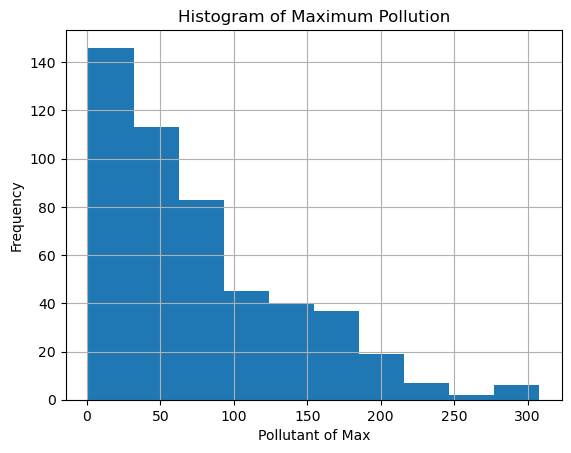

In [11]:
df['pollutant_max'].hist()
plt.title('Histogram of Maximum Pollution')
plt.xlabel('Pollutant of Max')
plt.ylabel('Frequency')
plt.show()

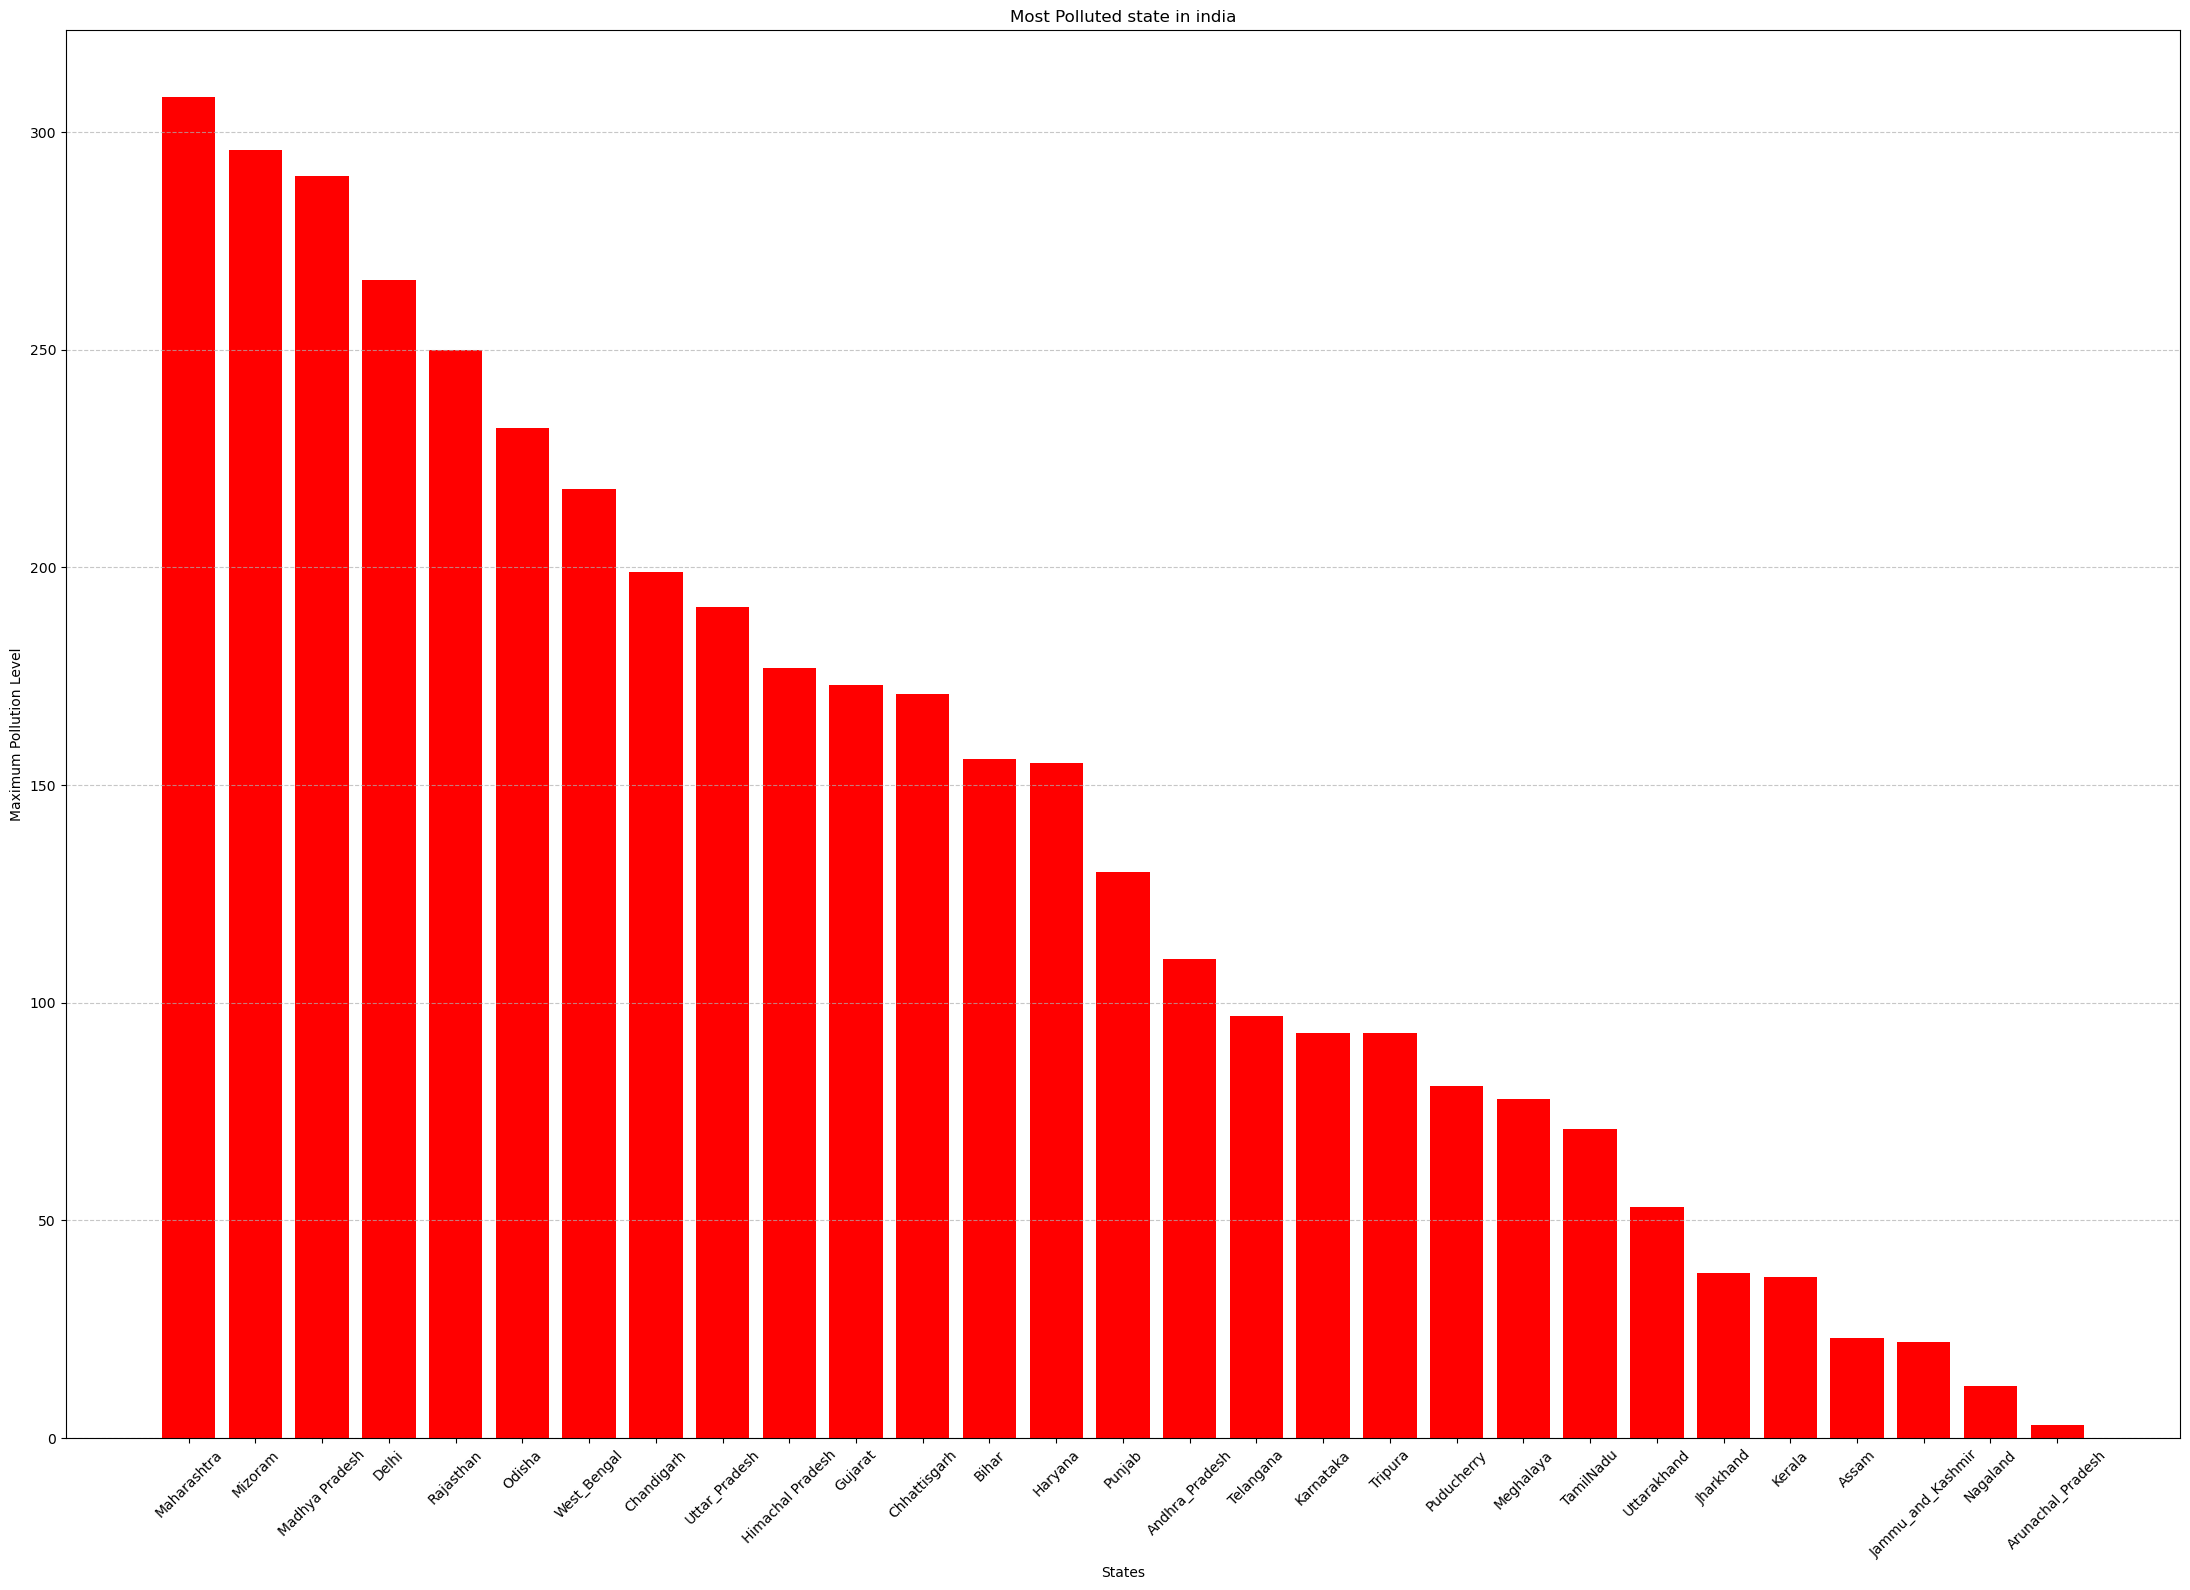

In [52]:
# Sort by pollutant_max in descending order
top_cities = df.sort_values(by='pollutant_max', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(22, 16))
plt.bar(top_cities['state'], top_cities['pollutant_max'], color='red')

# Customizing the plot
plt.xlabel('States')
plt.ylabel('Maximum Pollution Level')
plt.title('Most Polluted state in india')
plt.xticks(rotation=45)  # Rotate state labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

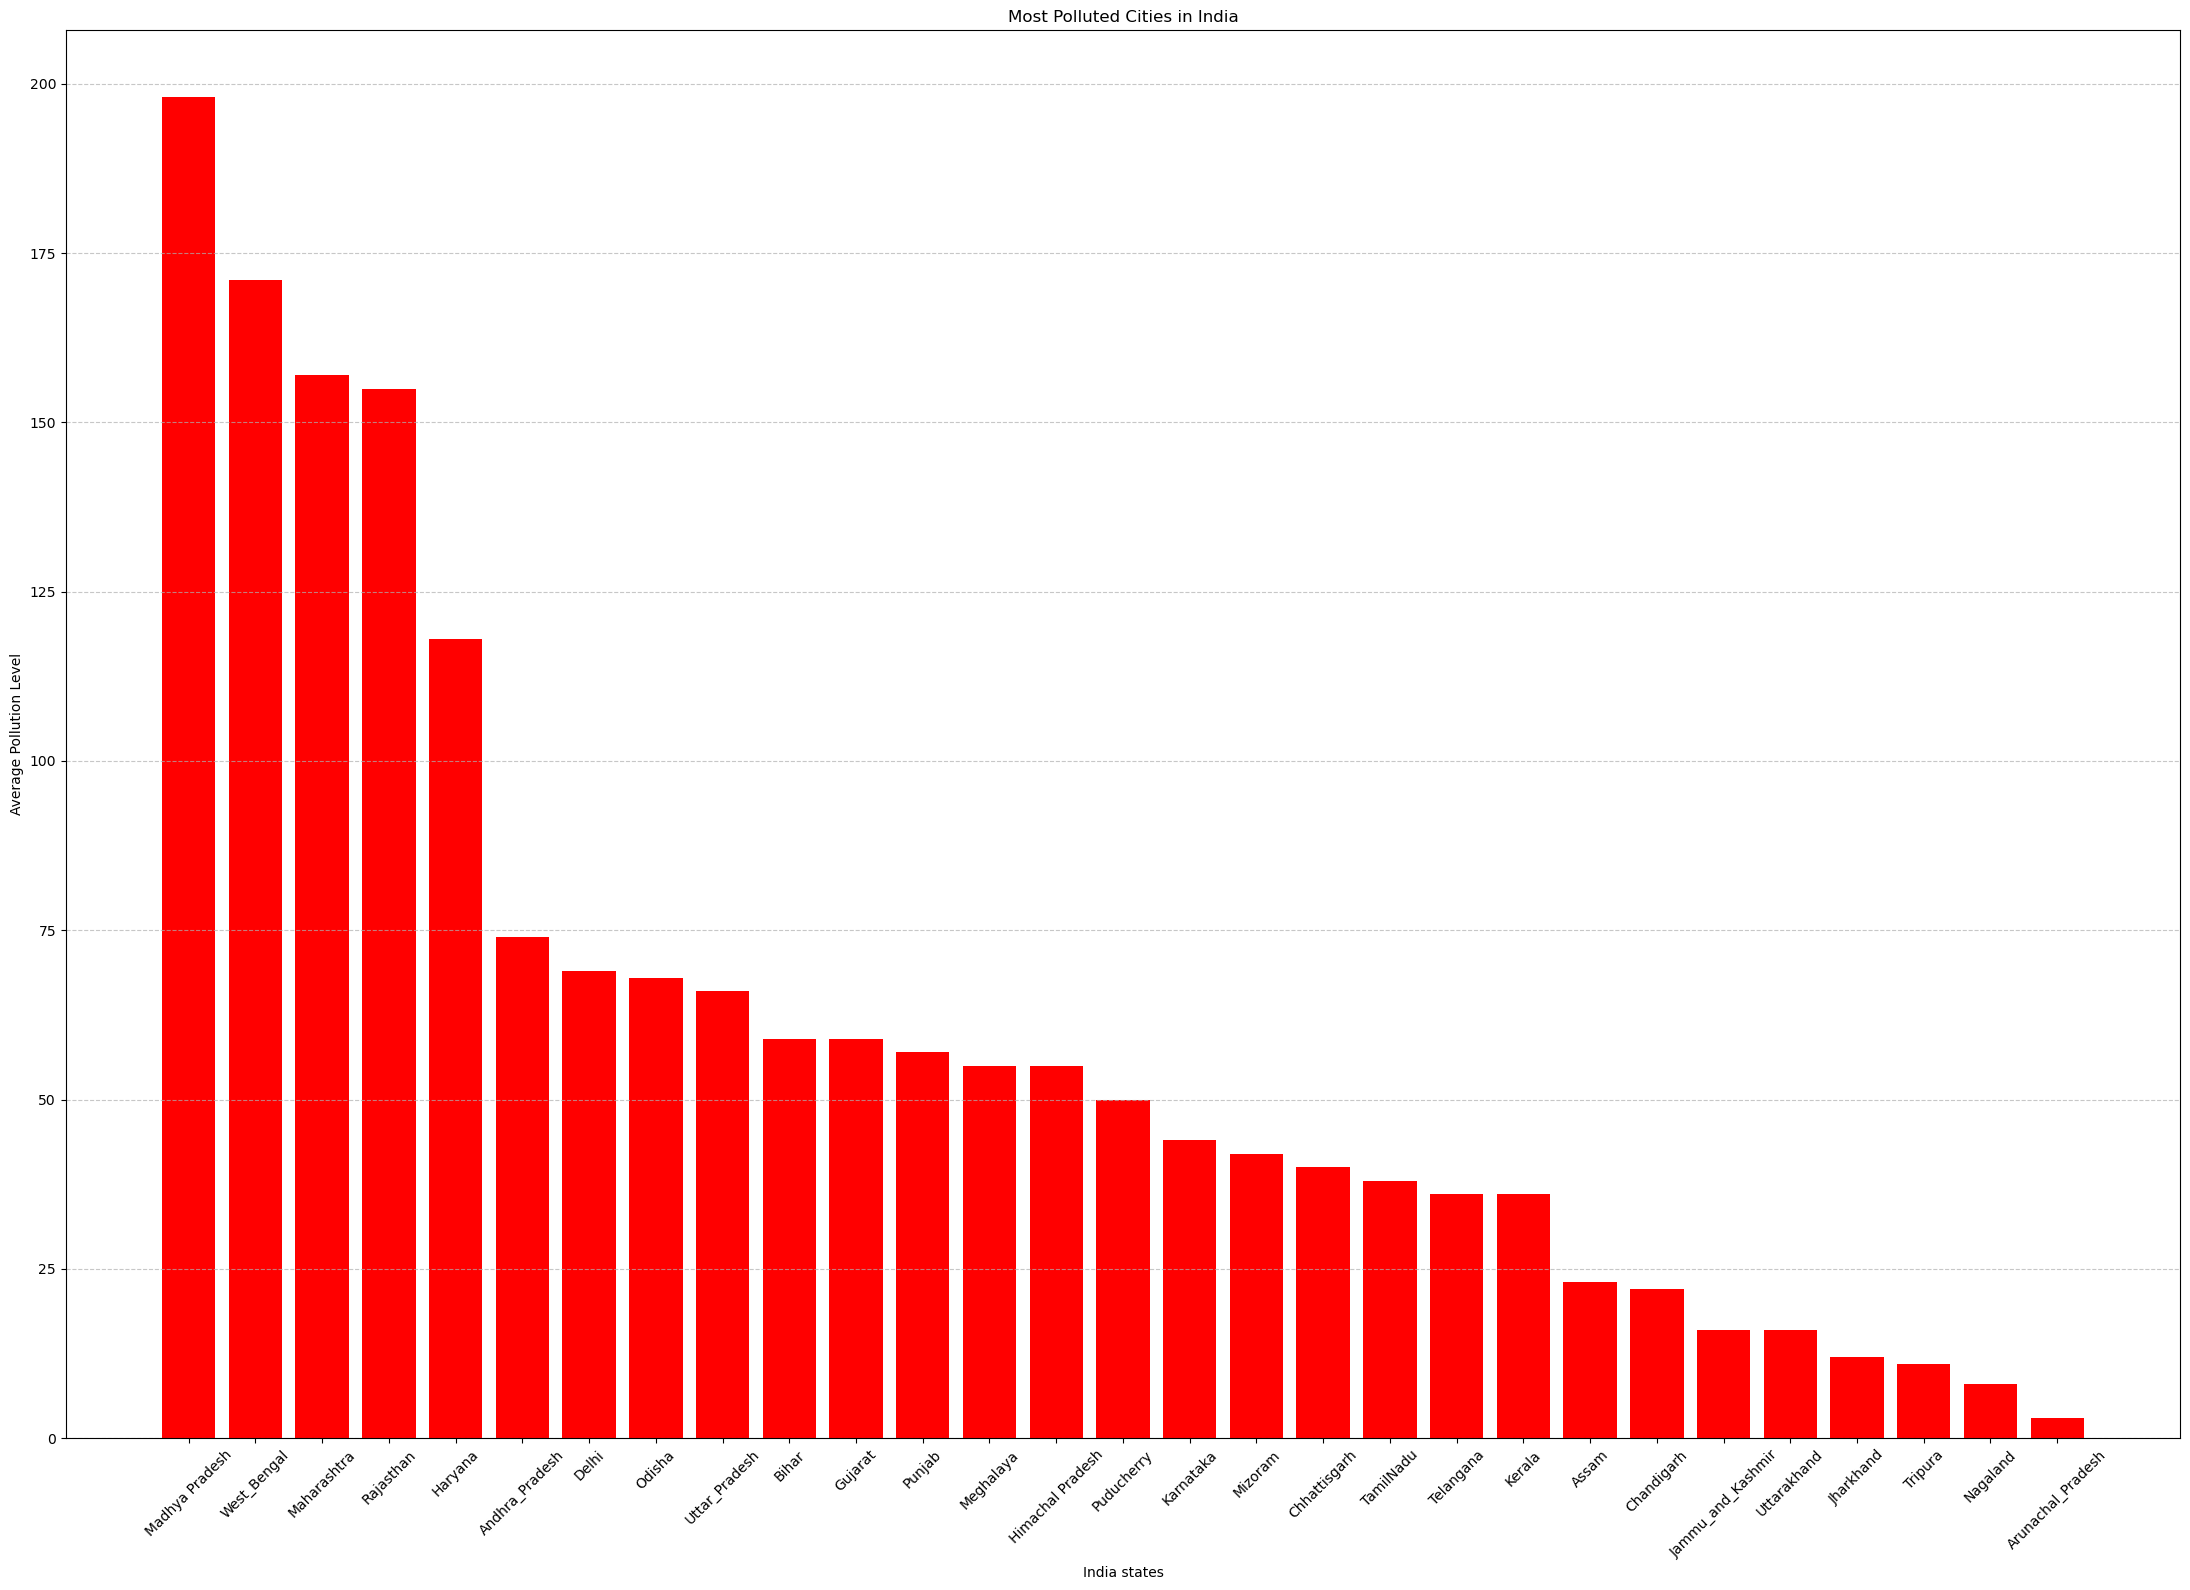

In [42]:
# Sort by pollutant_avg in descending order and select top 10
top_cities = df.sort_values(by='pollutant_avg', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(22, 16))
plt.bar(top_cities['state'], top_cities['pollutant_avg'], color='red')

# Customizing the plot
plt.xlabel('India states')
plt.ylabel('Average Pollution Level')
plt.title('Most Polluted Cities in India')
plt.xticks(rotation=45)  # Rotate city labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

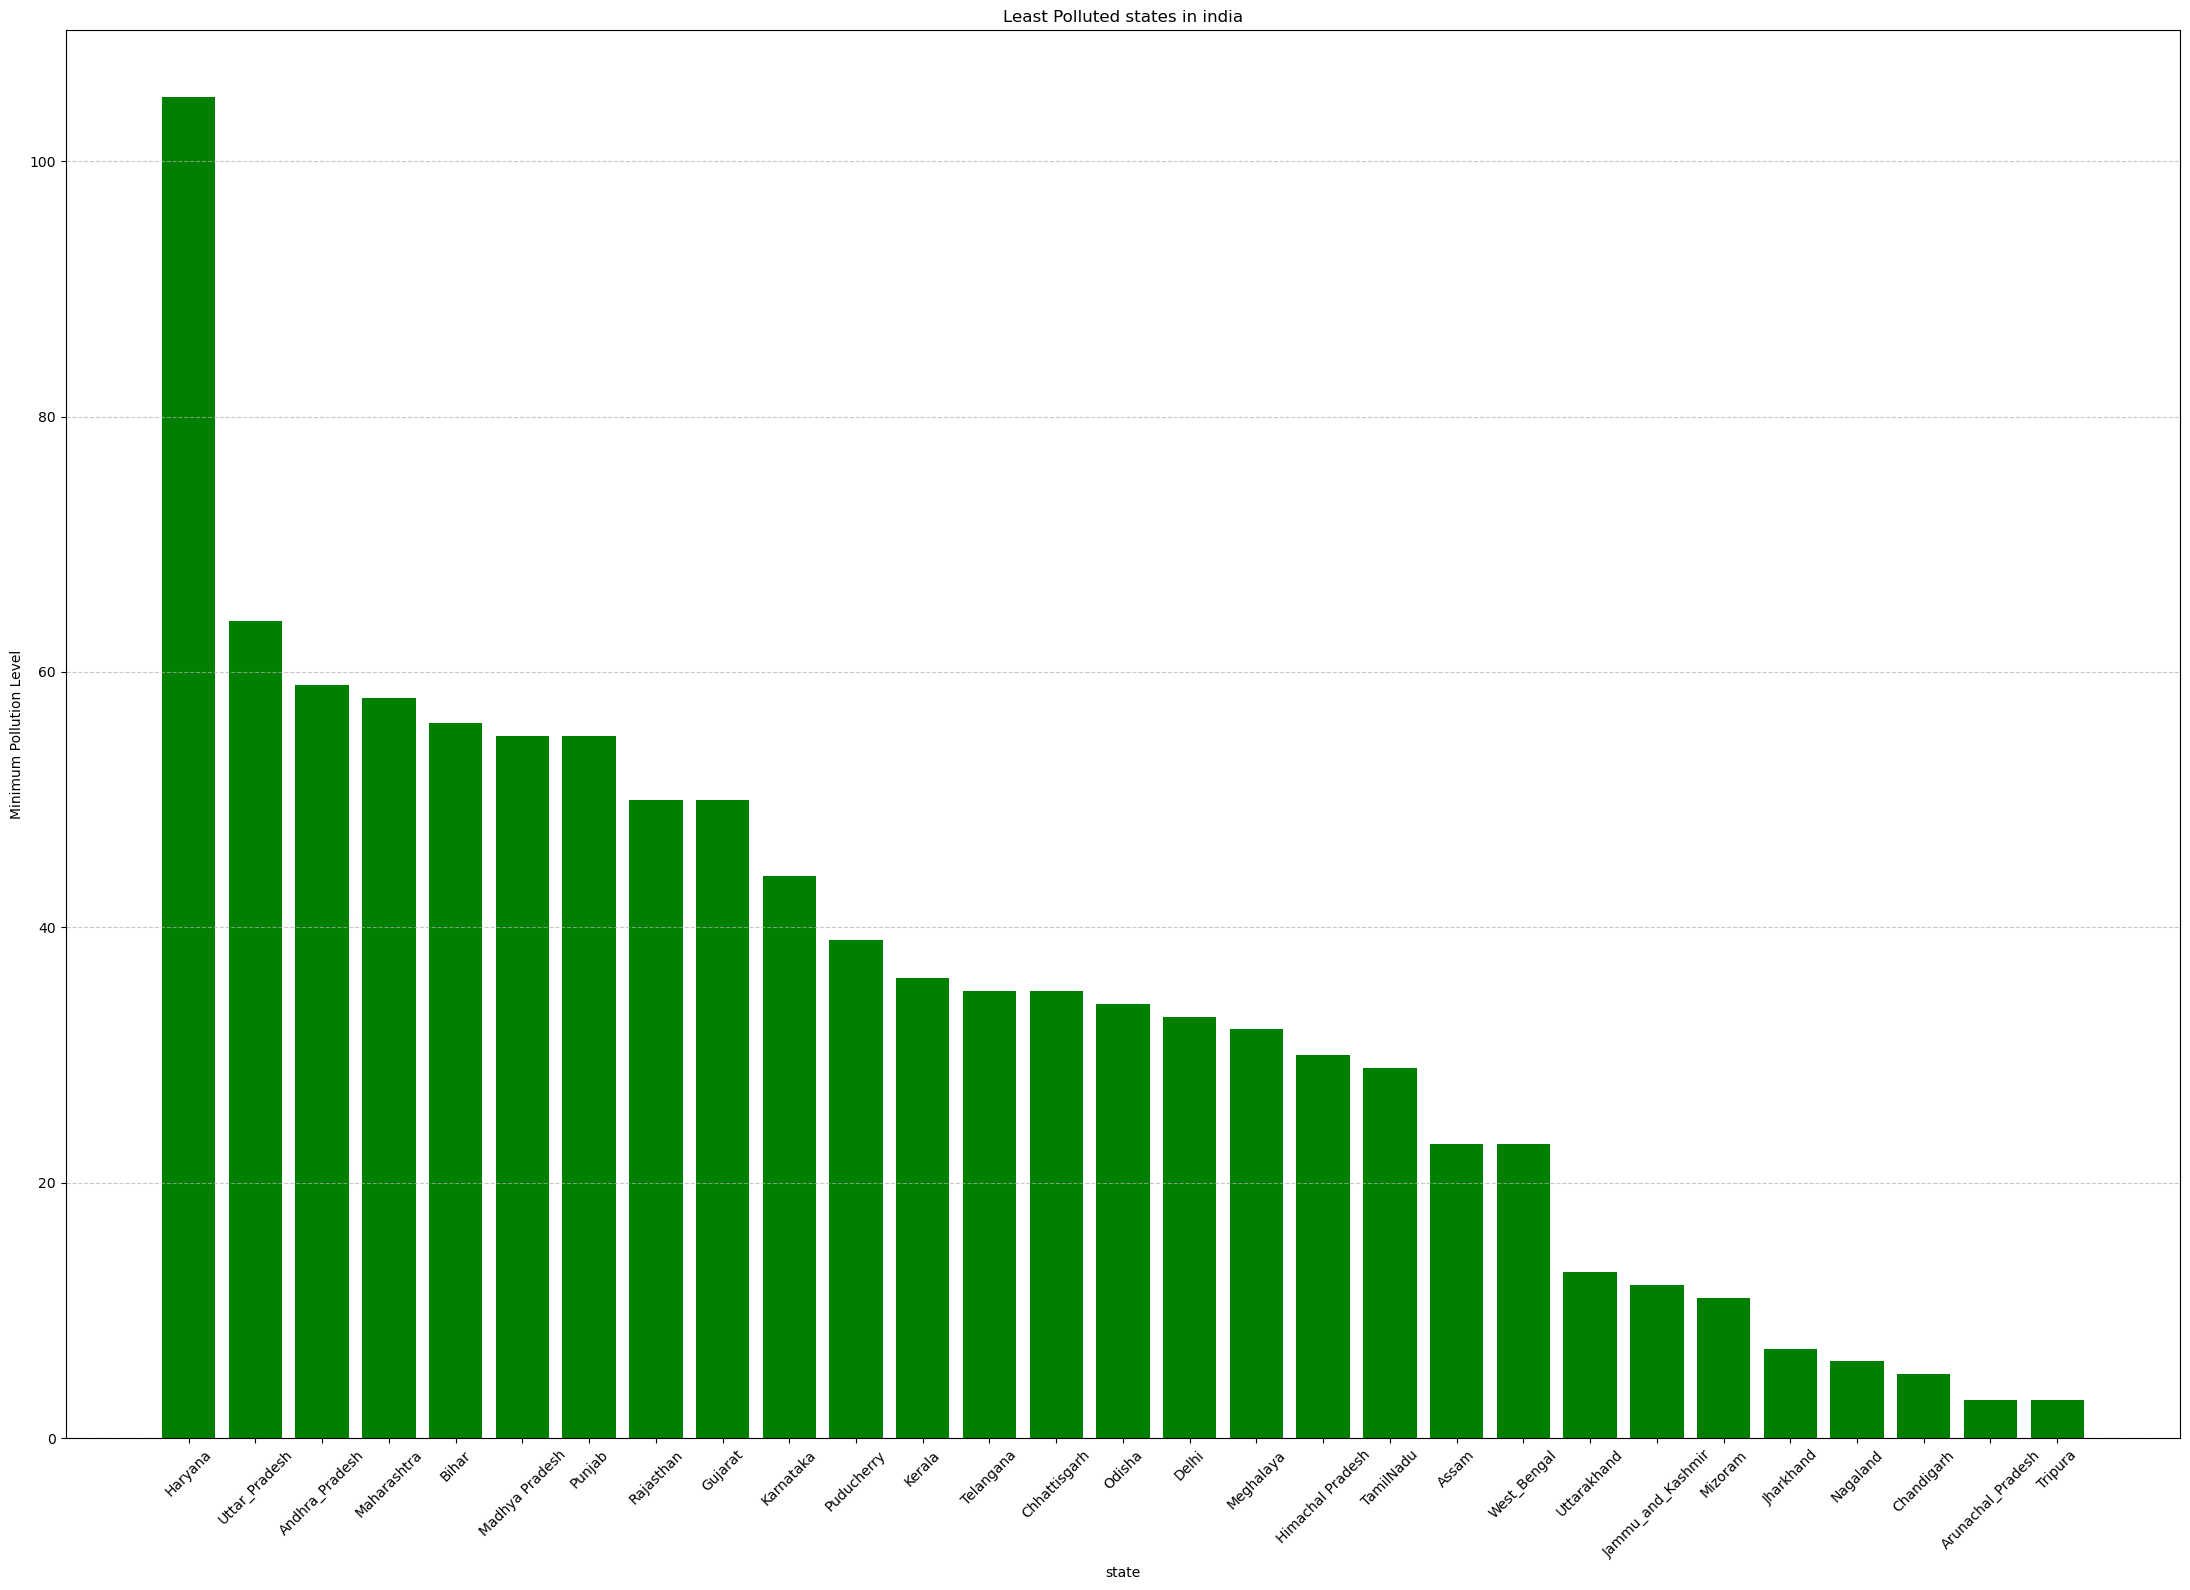

In [54]:
# Sort by pollutant_min in descending order 
top_cities = df.sort_values(by='pollutant_min', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(22, 16))
plt.bar(top_cities['state'], top_cities['pollutant_min'], color='green')

# Customizing the plot
plt.xlabel('state')
plt.ylabel('Minimum Pollution Level')
plt.title('Least Polluted states in india')
plt.xticks(rotation=45)  # Rotate state labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

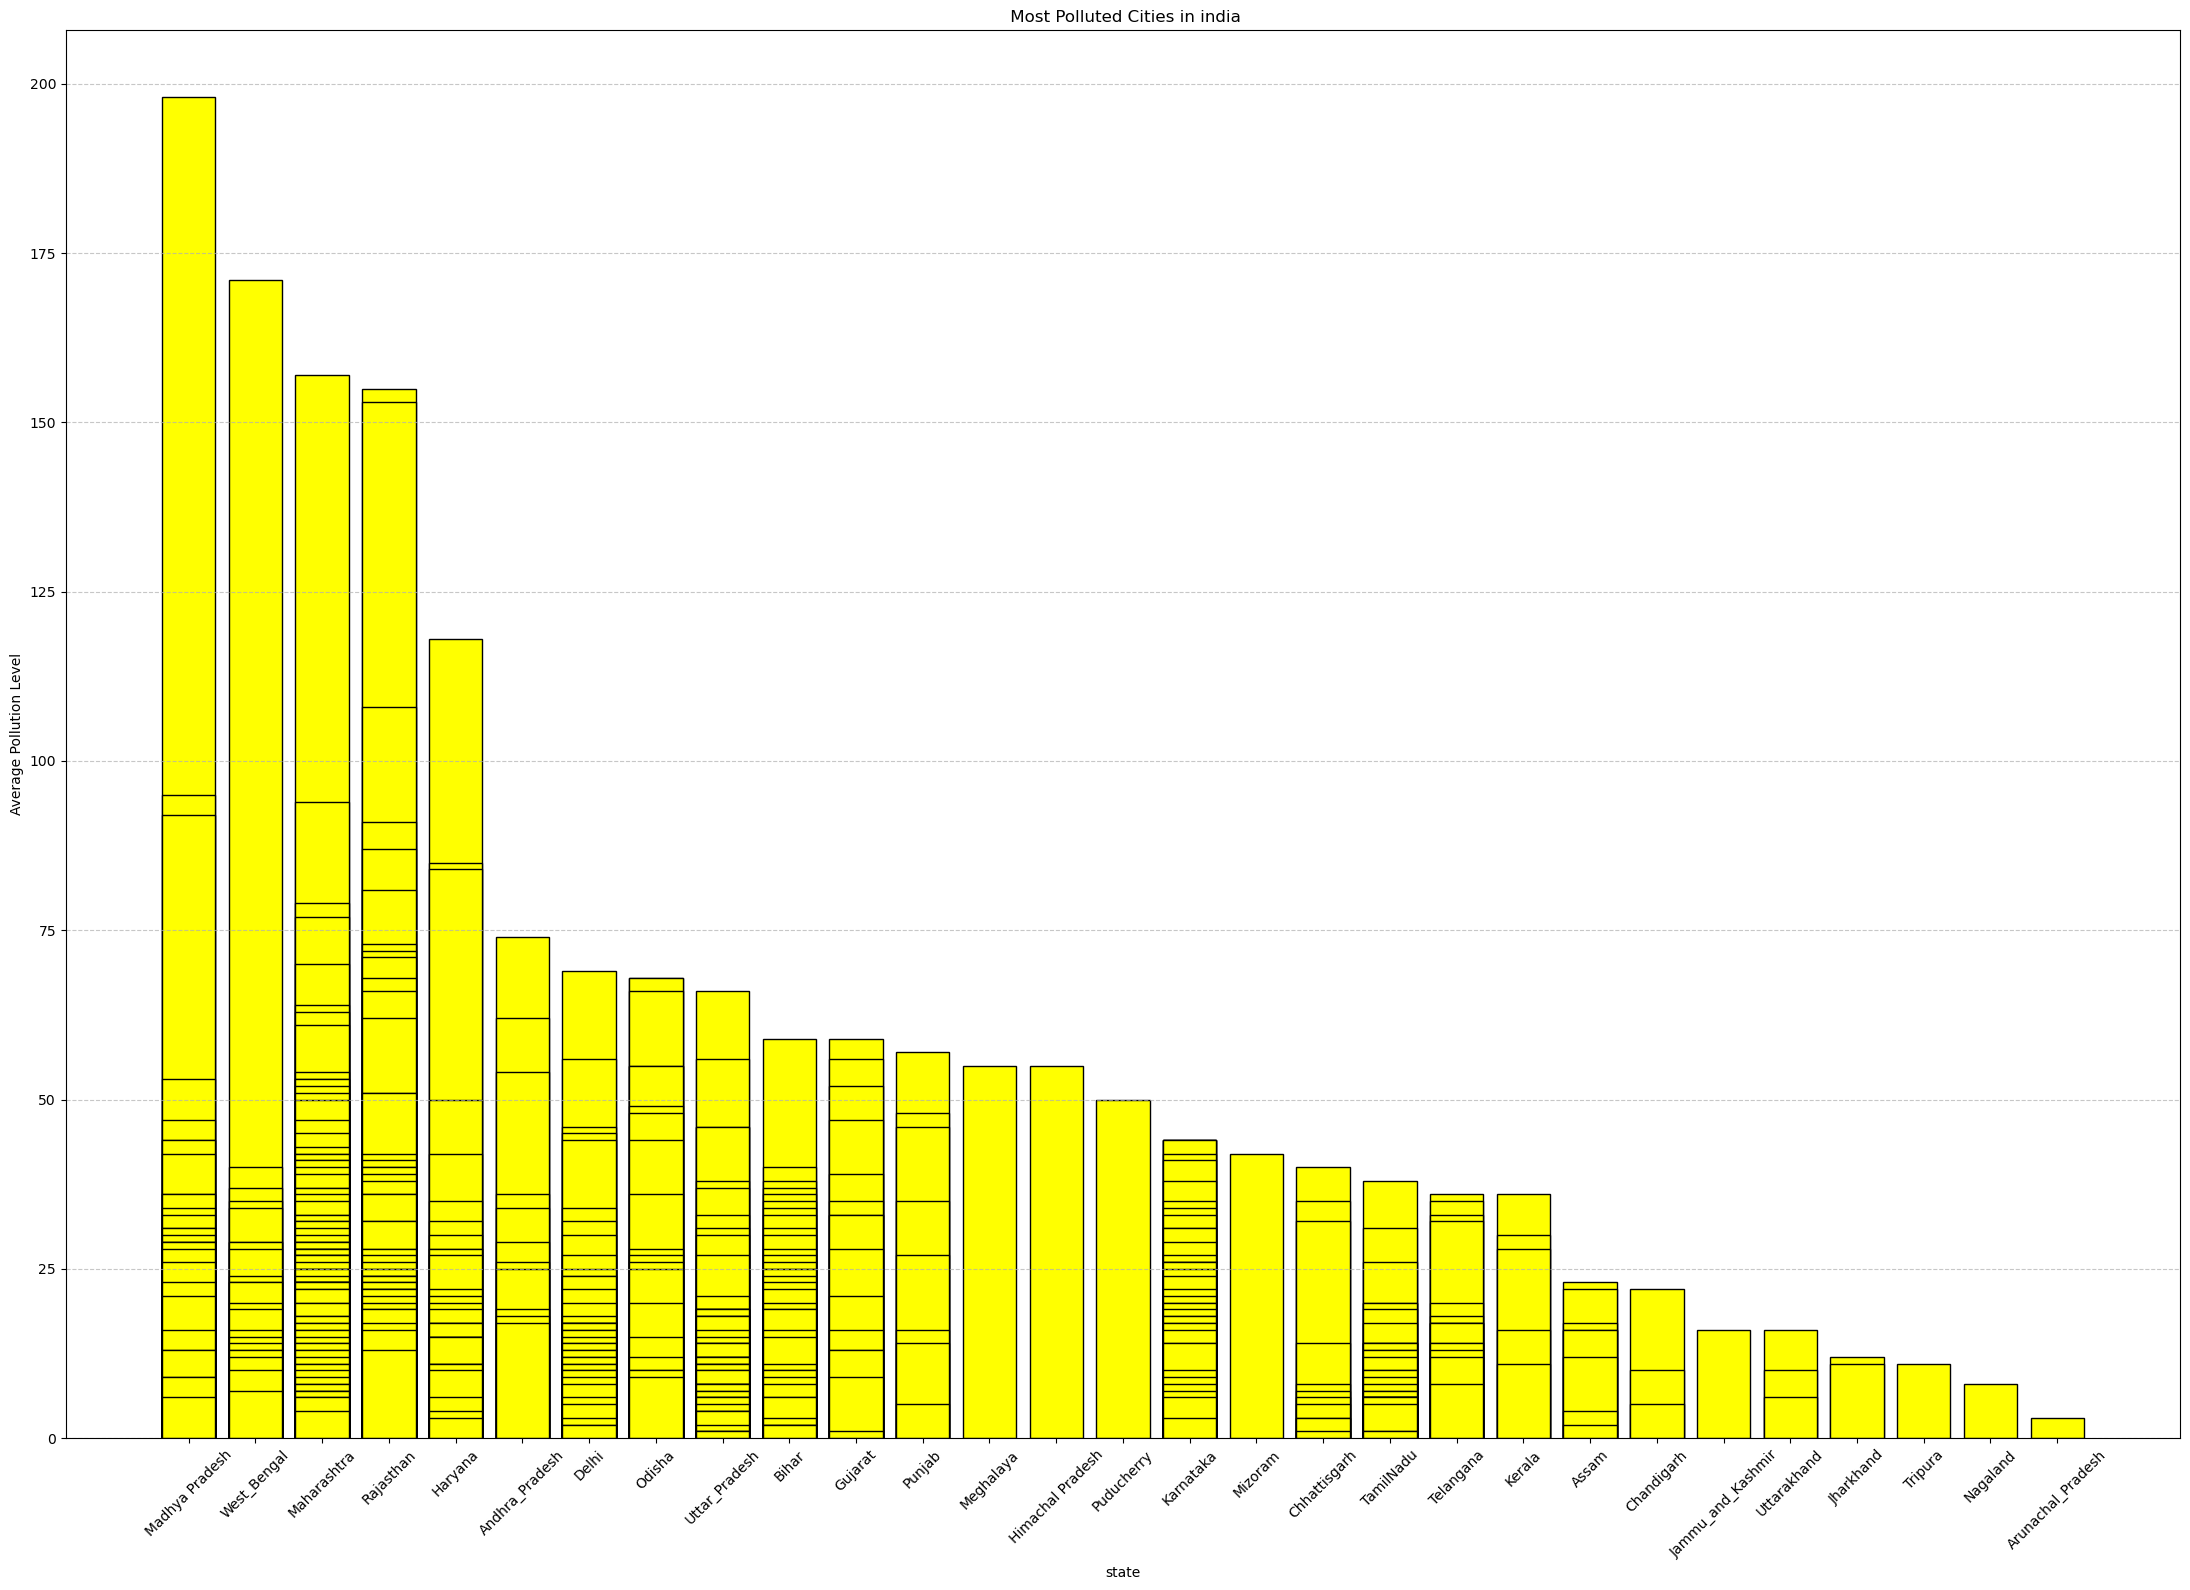

In [62]:
# Sort by pollutant_avg in descending order 
top_cities = df.sort_values(by='pollutant_avg', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(22, 16))
plt.bar(top_cities['state'], top_cities['pollutant_avg'], color='yellow',edgecolor='black')

# Customizing the plot
plt.xlabel('state')
plt.ylabel('Average Pollution Level')
plt.title(' Most Polluted Cities in india')
plt.xticks(rotation=45)  # Rotate city labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

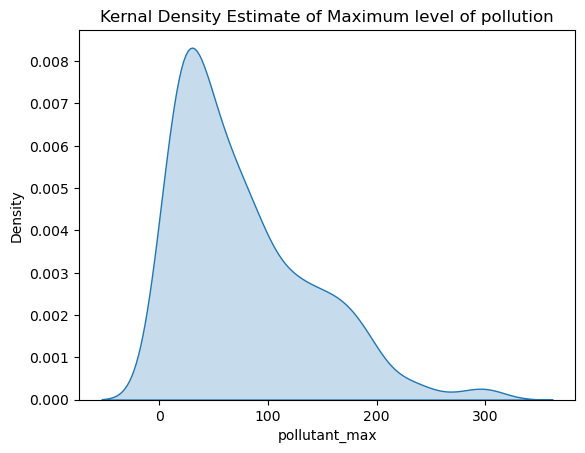

In [13]:
# Using the Kde plots with find the Maximum level of pollution distribution
import warnings
warnings.filterwarnings('ignore')
sns.kdeplot(data['pollutant_max'],shade=True)
plt.xlabel('pollutant_max')
plt.ylabel('Density')
plt.title('Kernal Density Estimate of Maximum level of pollution')
plt.show()

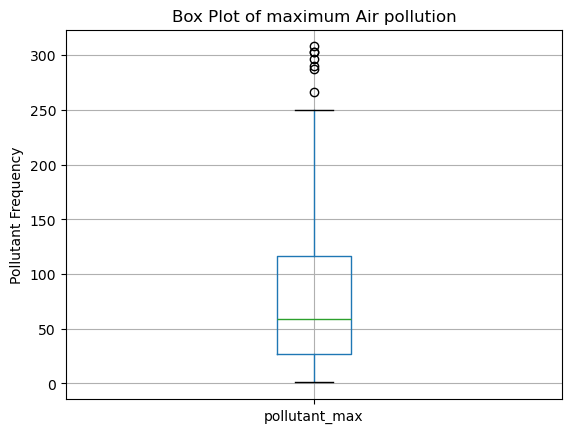

In [33]:
#find the extreme value of the dataframe using the boxplot method
#Its can be used for find the outlayers in the dataframe
df.boxplot(column='pollutant_max')
plt.title('Box Plot of maximum Air pollution')
plt.ylabel('Pollutant Frequency')
plt.show()

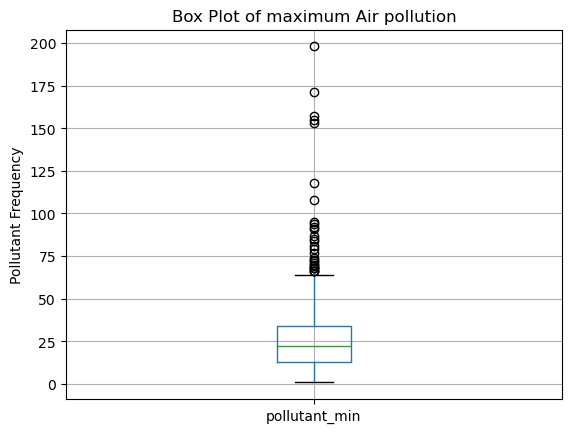

In [122]:
df.boxplot(column='pollutant_min')
plt.title('Box Plot of maximum Air pollution')
plt.ylabel('Pollutant Frequency')
plt.show()

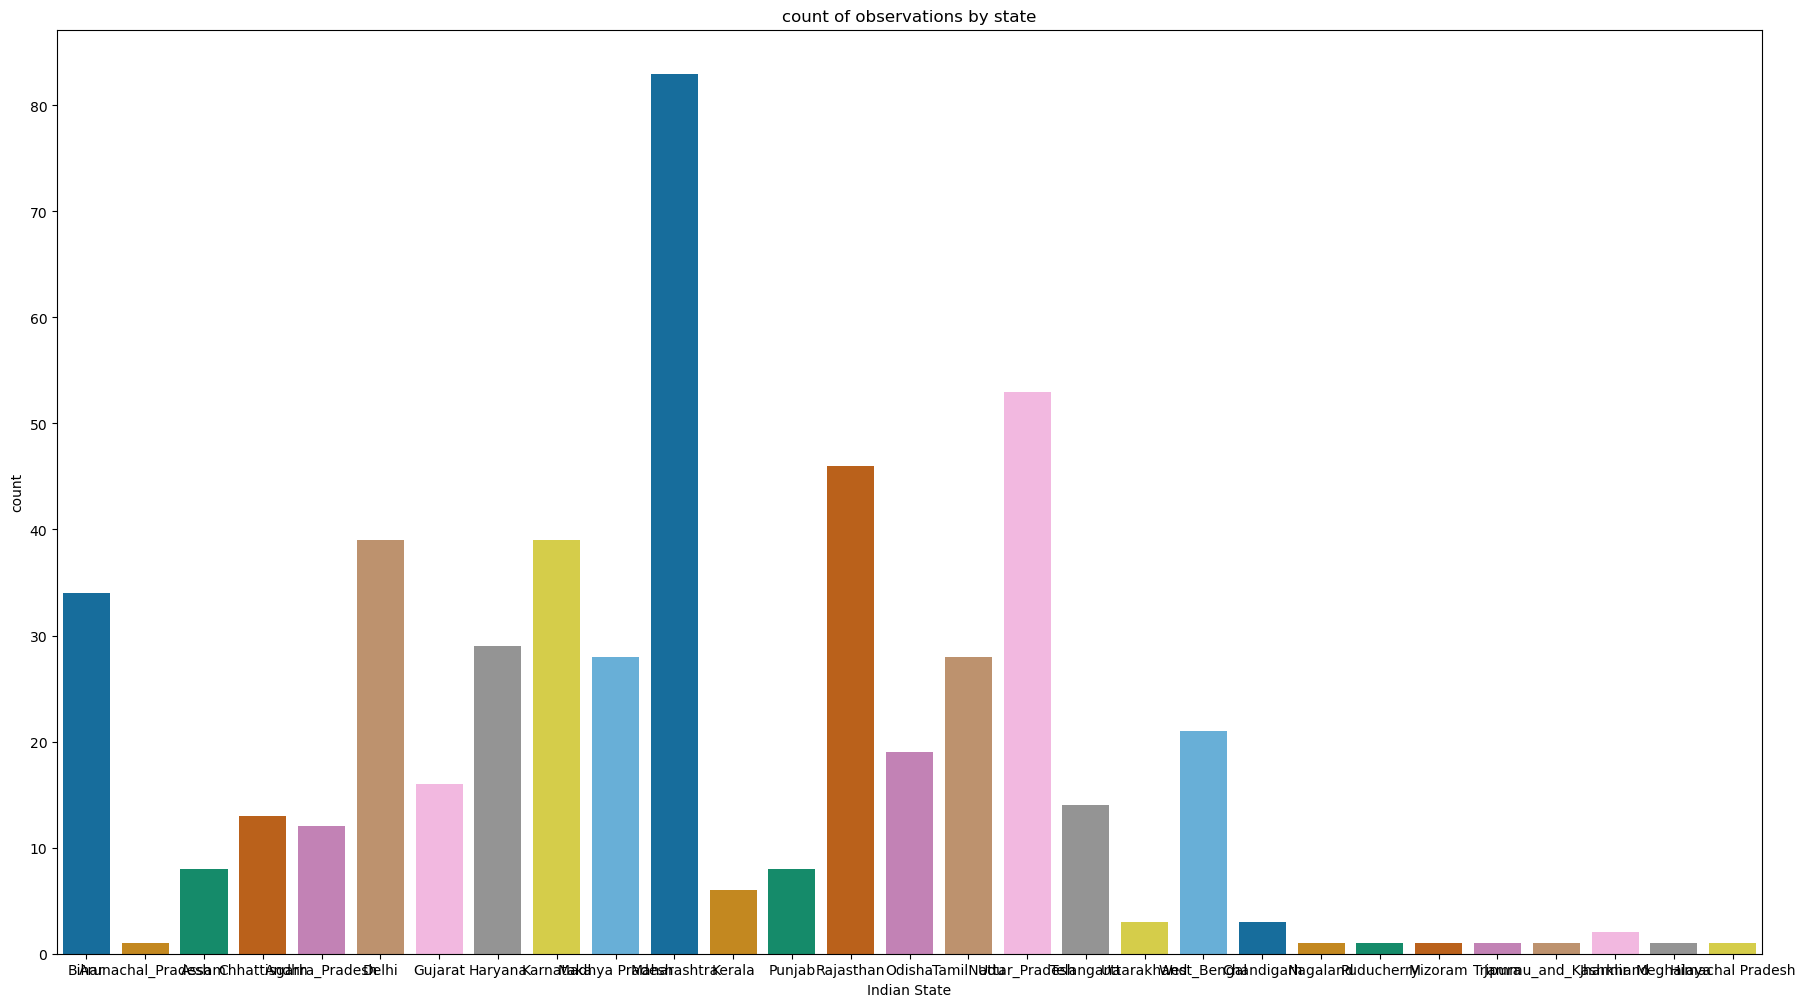

In [140]:
# Using the count plot number city in state counts
plt.figure(figsize=(22,12))
sns.countplot(x='state',data=data,palette='colorblind')
plt.xlabel('Indian State')
plt.ylabel('count')
plt.title('count of observations by state')
plt.show()

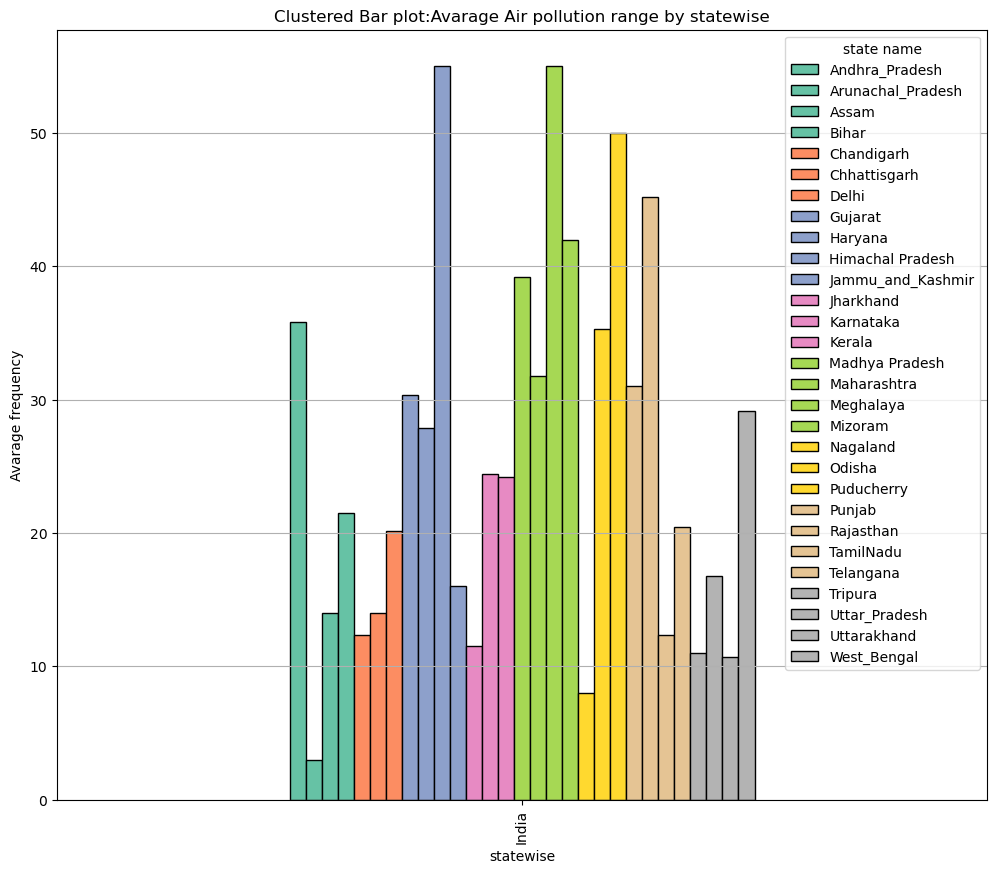

In [27]:
##visualizing the statewaise avarage pollution level in a dataset
air_pollution_statewise=df.groupby(['country','state'])['pollutant_avg'].mean().unstack()
air_pollution_statewise.plot(kind='bar',colormap='Set2',figsize=(12,10),edgecolor='black')
plt.xlabel('statewise')
plt.ylabel('Avarage frequency')
plt.title('Clustered Bar plot:Avarage Air pollution range by statewise')
plt.legend(title='state name')
plt.grid(axis='y')
plt.show()

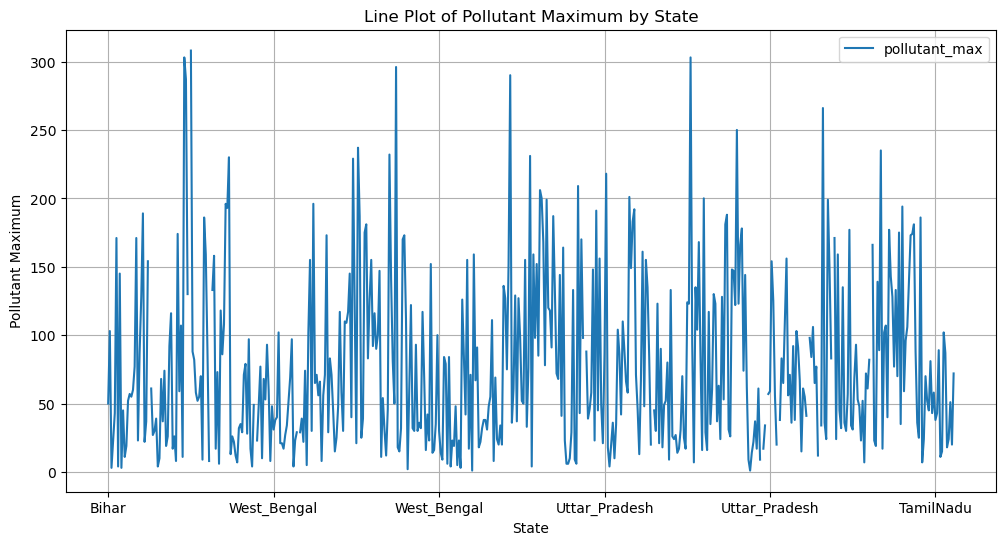

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
df.plot.line(x='state', y='pollutant_max', ax=plt.gca())
plt.title('Line Plot of Pollutant Maximum by State')
plt.xlabel('State')  # Corrected label from 'City' to 'State'
plt.ylabel('Pollutant Maximum')
plt.grid(True)  # Optional: add a grid for better clarity
plt.show()

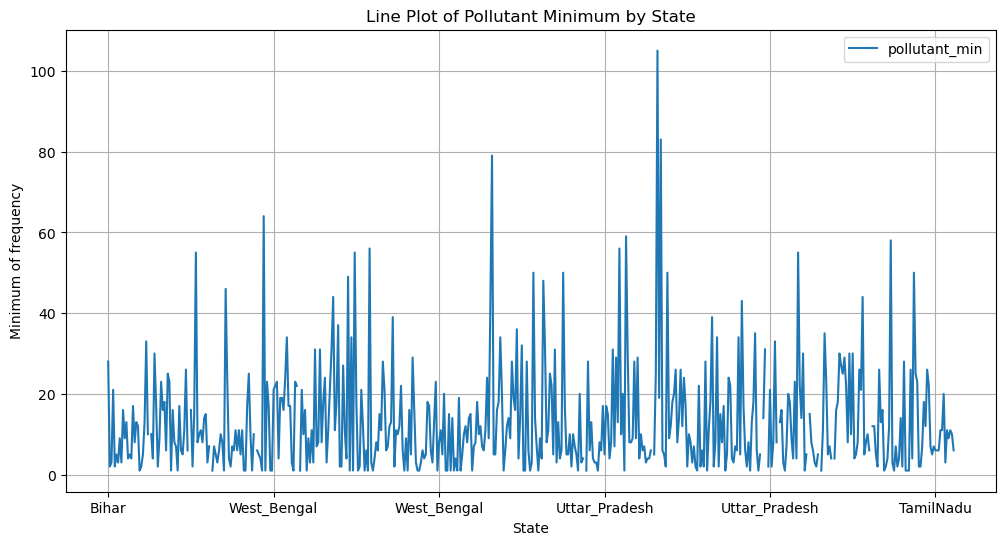

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
df.plot.line(x='state', y='pollutant_min', ax=plt.gca())
plt.title('Line Plot of Pollutant Minimum by State')
plt.xlabel('State')  # Corrected label from 'City' to 'State'
plt.ylabel('Minimum of frequency')
plt.grid(True)  # Optional: add a grid for better clarity
plt.show()

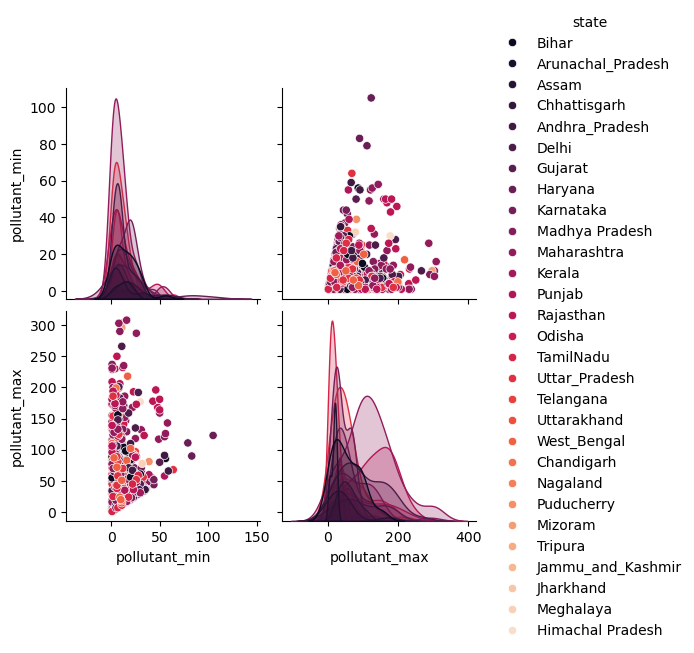

In [31]:
#The pair plot wil be use to distributed across different states, highlighting patterns on pollution levels in various regions.
sns.pairplot(df,vars=['pollutant_min','pollutant_max'],hue='state',palette='rocket')
plt.show()

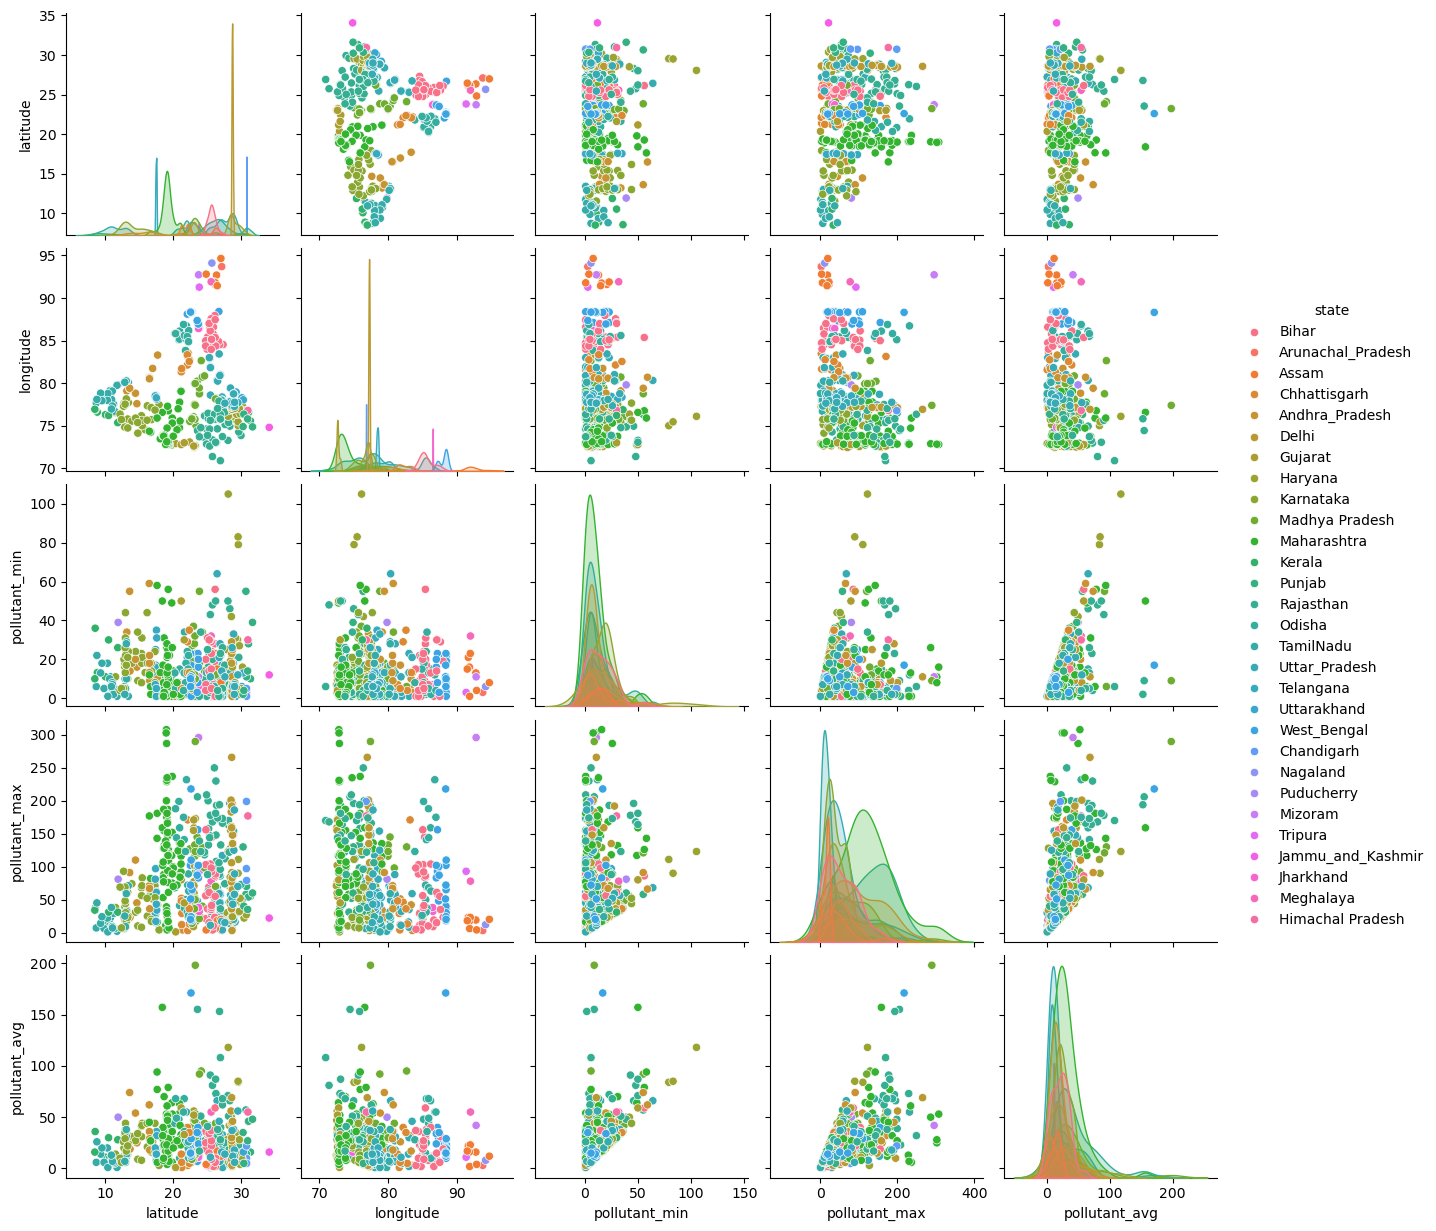

In [29]:
#visualizing the pairwise relationships between variables in a dataset
sns.pairplot(df,hue='state')
plt.show()

## Hypothesis testing

##  One sample t-test

In [101]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
avge = df['pollutant_avg']
mean_age = np.mean(avge)
print(mean_avge)
_,p_value = stats.ttest_1samp(a=sample_age,popmean=mean_age)
if p_value<0.05:
    print("reject the null hypothesis")
else:
    print("Accept the null hypothesis")#this is for one-sampling, you can increase the sample size

27.076305220883533
Accept the null hypothesis


## Independant two sample t-test

In [17]:
from scipy.stats import ttest_ind

# Define the two state for pollutant average levels
state1 = df[df['state'] == 'TamilNadu']['pollutant_avg']  # Non-pollutant state
state2 = df[df['state'] == 'Delhi']['pollutant_avg']  # pollutant state

# Calculate and display variances
avrg_state1 = np.var(state1, ddof=1)  # Using ddof=1 for sample variance
avrg_state2 = np.var(state2, ddof=1)  # Using ddof=1 for sample variance
print("Variance of pollutant_avg for non-pollutant state:", avrg_state1)
print("Variance of pollutant_avg for pollutant state:", avrg_state2)
# Check if variances are approximately equal
alpha = 0.05

# Perform the two-sample t-test with the appropriate equal_var setting
t_stat, p_val = ttest_ind(group1, group2)
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < alpha:
    print("Since p-value < alpha, we reject the null hypothesis: there is a significant difference between the state.")
else:
    print('Since p-value < alpha,we accept the null hypothesis:there is a significant no difference between the state')


Variance of pollutant_avg for non-pollutant state: 75.41137566137569
Variance of pollutant_avg for pollutant state: 223.7651821862348
t-statistic: -2.4832642428890357
p-value: 0.015607506792704716
Since p-value < alpha, we reject the null hypothesis: there is a significant difference between the state.


## Chi-square t testing

In [80]:
from scipy.stats import chi2_contingency

df['state'] = df['city']

contingency_table_diabetes = pd.crosstab(df['state'], df['pollutant_avg'])

chi2, p, dof, expected = chi2_contingency(contingency_table_diabetes)

print("Contingency Table:\n", contingency_table_diabetes)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < 0.05:
    print("Reject the null hypothesis - state and pollutant_max, pollutant_avg are not independent")
else:
    print("Fail to reject the null hypothesis - age group and diabetes outcome are independent")

Contingency Table:
 pollutant_avg  1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    \
state                                                                          
Agartala           0      0      0      0      0      0      0      0      0   
Agra               2      0      0      1      0      0      0      0      0   
Ahmedabad          0      0      0      0      0      0      0      0      0   
Ahmednagar         0      0      0      0      0      0      0      0      0   
Aizawl             0      0      0      0      0      0      0      0      0   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
Virudhunagar       0      0      0      0      0      0      0      0      0   
Visakhapatnam      0      0      0      0      0      0      0      0      0   
Vrindavan          0      0      0      0      0      0      0      0      0   
Yadgir             0      0      0      0      0      0      0      0      0   
Yamuna Nagar       0